In [2]:
# === Connect to Google Drive ===
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

# Define project data path
data_path = "/content/drive/MyDrive/HeartProject/data"

# Load processed data (from previous steps)
X_scaled_df = pd.read_csv(os.path.join(data_path, "X_scaled.csv"))
y_binary = pd.read_csv(os.path.join(data_path, "y_binary.csv")).squeeze()

print("✅ Data loaded successfully from Google Drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully from Google Drive


# Step 5 – Unsupervised Learning (Clustering & Dimensionality Reduction)

In this step, we apply **unsupervised learning techniques** on the processed dataset:

1. **PCA (Principal Component Analysis)**  
   - Reduce the dimensionality of the dataset to 2 components.  
   - Allows visualization of clustering results in 2D space.  

2. **K-Means Clustering**  
   - Apply K-Means with 2 clusters (since the target is binary: disease/no disease).  
   - Evaluate clustering quality using **Silhouette Score**.  
   - Visualize the clusters after PCA transformation.  

3. **Hierarchical Clustering**  
   - Perform Agglomerative Clustering with 2 clusters using Ward linkage.  
   - Calculate **Silhouette Score** for cluster quality evaluation.  
   - Visualize the clusters in PCA-reduced 2D space.  

4. **Dendrogram Analysis**  
   - Build a dendrogram using hierarchical clustering (Ward’s method).  
   - Helps to analyze the merging of samples and possible cluster structures.  

5. **Comparison with True Labels**  
   - Visualize the PCA projection with the true labels (y_binary).  
   - Compare clustering results against actual class distribution.  

This step provides insights into the natural structure of the dataset and checks whether clustering methods can separate patients with and without heart disease without supervision.


PCA (Dimensionality Reduction)

In [3]:
# === PCA Transformation ===
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

print("✅ PCA completed. Shape:", X_pca.shape)


✅ PCA completed. Shape: (303, 2)


K-Means Clustering

K-Means Silhouette Score: 0.14249854343773868


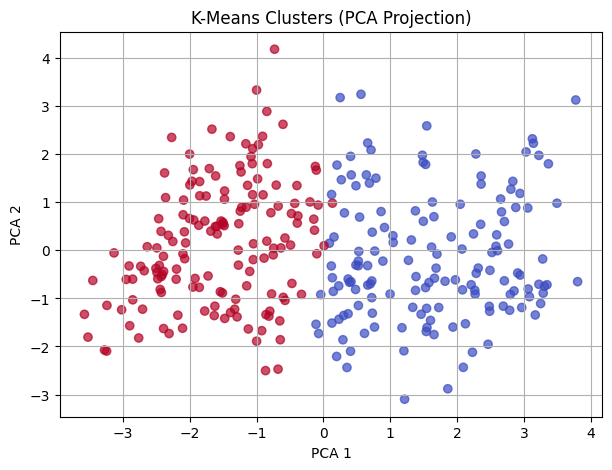

In [4]:
# === K-Means Clustering ===
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled_df)

silhouette_kmeans = silhouette_score(X_scaled_df, clusters_kmeans)
print("K-Means Silhouette Score:", silhouette_kmeans)

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap="coolwarm", alpha=0.7)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Hierarchical Clustering

Hierarchical Silhouette Score: 0.10133971846327013


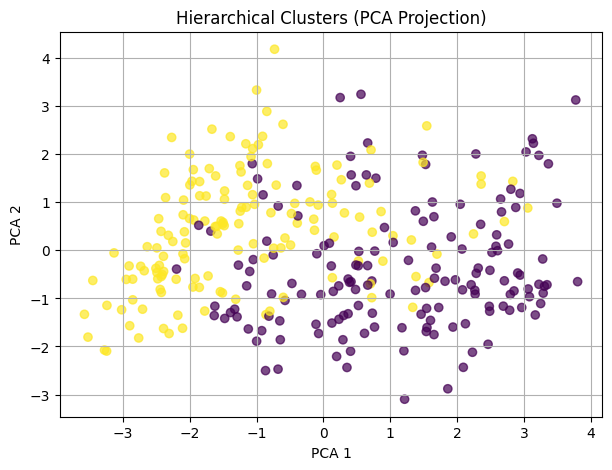

In [5]:
# === Hierarchical Clustering ===
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=2, linkage="ward")
clusters_hier = hier.fit_predict(X_scaled_df)

silhouette_hier = silhouette_score(X_scaled_df, clusters_hier)
print("Hierarchical Silhouette Score:", silhouette_hier)

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hier, cmap="viridis", alpha=0.7)
plt.title("Hierarchical Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Dendrogram

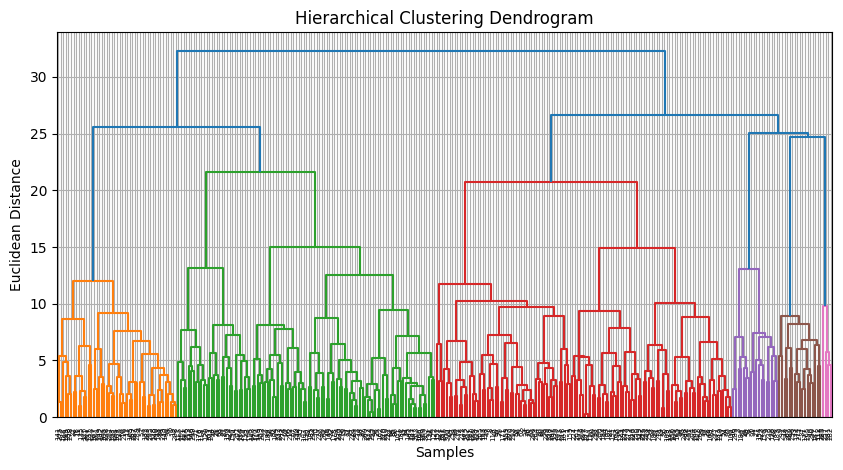

In [6]:
# === Dendrogram (Hierarchical Clustering) ===
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled_df, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


True Labels vs PCA Projection

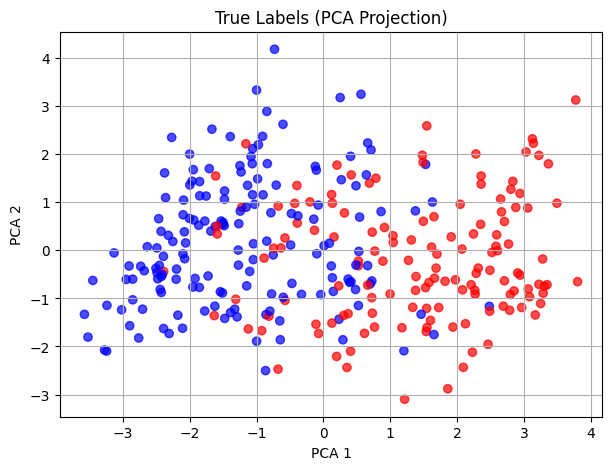

In [7]:
# === True Labels Visualization ===
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_binary, cmap="bwr", alpha=0.7)
plt.title("True Labels (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
